### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [287]:
import numpy as np

In [288]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  #x 
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #таргет
n = len(zp)

x = zp
y = ks

Рассчитаем коэффициенты линейной регрессии **с использованием intercept**

In [289]:
b = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - (x.mean() ** 2))
b

2.620538882402765

In [290]:
a = y.mean() - b * x.mean()
a

444.1773573243596

In [291]:
import matplotlib.pyplot as plt

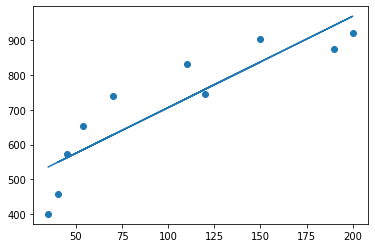

In [292]:
plt.scatter(x, y)
plt.plot(x, a+b*x)

In [293]:
# Проверим полученные коэффициенты матричным методом 

In [294]:
x = x.reshape((len(x)), 1)
y = y.reshape((len(x)), 1)

In [295]:
x_ = np.hstack([np.ones((len(x), 1)), x])
x_ 

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [296]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [297]:
B = np.dot(np.linalg.inv(np.dot(x_.T, x_)), x_.T@y)
B

array([[444.17735732],
       [  2.62053888]])

Получившиеся значения совпадают, все верно
Получается линейная модель вида: y = 444.177 + 1.62*x

Рассчитаем коэффициент линейной регресси **без интерсепта матричным методом**
Градиентным спуском рассчитаем в задаче 2 и сравним результат

In [298]:
#Матричный метод - нам не нужен столбец с единицами
B1 = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
B1

array([[5.88982042]])

Получаем уравнение линейной регрессии вида: y =  5.89*x

### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [299]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  #x 
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #таргет
n = len(zp)

x = zp
y = ks

alpha = 1e-06

In [300]:
def mse_(B, x=x, y=y, n=n):
    return np.sum((y - B*x)**2)/n

In [301]:
#Найдем производную mse по B
mse_p = (2/n)*np.sum((y - B*x)*(-x))

In [302]:
B = 2 # потестировала, какой бы не выбрали В, рано или поздно приходим к тому же самому минимуму
for i in range(1000):
    B -= alpha * (2/n)*np.sum((y - B*x)*(-x))
    if i % 100 == 0:
        print(f'iteration: {i}, B : {B}, mse: {mse_(B) }')

iteration: 0, B : 2.107177, mse: 253637.8412260619
iteration: 100, B : 5.6584112538881115, mse: 57254.59813165116
iteration: 200, B : 5.8756636000800775, mse: 56519.61946064067
iteration: 300, B : 5.888954354378881, mse: 56516.86874913225
iteration: 400, B : 5.889767437196752, mse: 56516.858454392954
iteration: 500, B : 5.889817178818173, mse: 56516.85841586415
iteration: 600, B : 5.889820221840172, mse: 56516.85841571995
iteration: 700, B : 5.889820408001831, mse: 56516.85841571943
iteration: 800, B : 5.889820419390563, mse: 56516.85841571941
iteration: 900, B : 5.889820420087288, mse: 56516.8584157194


Таким образом, коэффициент, найденным матричным методом и методом градиентного спуска получился одинаковый

### Задание 3*
 Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации). 

In [303]:
def mse_(BO, B1, x=x, y=y, n=n):
  return np.sum((B0 + B1 * x - y)**2)/n

In [304]:
#Найдем производную mse по B0 и В1
mse_p_B0 = (2/n)* np.sum(B0 + B*x - y)
mse_p_B1 = (2/n)* np.sum((B0 + B*x - y)*x)

In [305]:
B0 = 0.1
B1 = 1
alpha_1 = 5e-06 # при тестировании поняла, что В0 изменяется сильнее, увеличим для него скорость обучения
alpha_2 = 1e-06
for i in range(3500000):
    B0 -= alpha_1 * (2/n)* np.sum(B0 + B1*x-y)
    B1 -= alpha_2 * (2/n)*np.sum((B0 + B1*x - y)*x)
    if i % 100000 == 0:
        print(f'B0 : {B0}, B1 : {B1} mse: {mse_(B0, B1)}')
        

B0 : 0.10608400000000001, B1 : 1.1347086861648 mse: 367894.5730068733
B0 : 99.71231591813189, B1 : 5.156134147612877 mse: 36569.32027093387
B0 : 176.87132698725011, B1 : 4.5881693337192475 mse: 24595.41012928853
B0 : 236.74697901110497, B1 : 4.147426728451465 mse: 17384.94633177018
B0 : 283.21068630344666, B1 : 3.805408984840631 mse: 13042.94045730623
B0 : 319.26667938871987, B1 : 3.5400020658213753 mse: 10428.26606973529
B0 : 347.246251255119, B1 : 3.3340454042762 mse: 8853.758261437091
B0 : 368.9584931000494, B1 : 3.1742223424225062 mse: 7905.619231133636
B0 : 385.80726577549353, B1 : 3.050199109045752 mse: 7334.667714699225
B0 : 398.8819700227979, B1 : 2.953956662938162 mse: 6990.851434913784
B0 : 409.0279844802069, B1 : 2.879272201159585 mse: 6783.8117286636725
B0 : 416.90132581342715, B1 : 2.8213168077054407 mse: 6659.136306106967
B0 : 423.01106516080006, B1 : 2.776343227519701 mse: 6584.059108253299
B0 : 427.7522434373346, B1 : 2.741443578079452 mse: 6538.849029779419
B0 : 431.43